# Example: Reaction Rates

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

Reference: Chapter 17 in McClarren.

## Learning Objectives

After studying this notebook, completing the activties, and attending class, you should be able to:
* Write and solve systems of differential equations using numpy methods and scipy methods.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import scipy.integrate as integrate

Consider two chemical reactions that convert molecule $A$ to desired product $B$ and a less valuable side-product $C$.

$A \overset{k_1}{\rightarrow} B \overset{k_2}{\rightarrow} C$

Our ultimate goal is to design a batch reactor that maximizes the production of $B$. This general sequential reactions problem is widely applicable in industry (especially chemicals, petrochemicals, pharmaceuticals, etc.).

The rate laws for these two chemical reactions are:

$r_A = -k_1 C_A$

$r_B = k_1 C_A - k_2 C_B$

$r_C = k_2 C_B$

$k_1$ and $k_2$ are reaction rate constants. These often depend on temperature, which we will ignore for now.

The concentrations in a batch reactor evolve with time per the following differential equations:

$$ \frac{d C_A}{dt} = r_A = -k_1 C_A $$

$$ \frac{d C_B}{dt} = r_B = k_1 C_A - k_2 C_B $$

$$ \frac{d C_C}{dt} = r_C = k_2 C_B $$

This is a linear system of differential equations. Assuming the feed is only species $A$, i.e., 

$$C_A(t=0) = C_{A0} \quad C_B(t=0) = 0 \quad C_C(t=0) = 0$$

leads to the following analytic solution:

$$C_A(t) = C_{A,0} \exp(-k_1 t)$$

$$C_B(t) = \frac{k_1}{k_2 - k_1} C_{A,0} \left[\exp(-k_1 t) - \exp(-k_2 t) \right]$$

$$C_C(t) = C_{A,0} - \frac{k_2}{k_2 - k_1} C_{A,0} \exp(-k_1 t) + \frac{k_1}{k_2 - k_1} \exp(-k_2 t) C_{A,0} = C_{A,0} - C_{A}(t) - C_{B}(t)$$

Below is Python code that plots these concentrations.

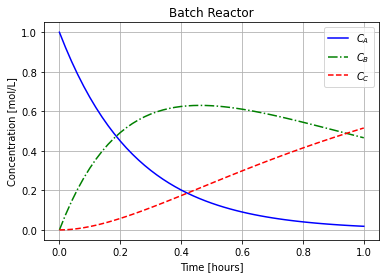

In [2]:
CA0 = 1 # Moles/L
k = [4, 1] # 1/hr

def exact_concentrations(t):
    ''' Exact solution for concentration profiles
    
    Arguments:
        t - time in hours (numpy array, length n)
        
    Returns:
        C: concentration of species A, B, and C in moles/L (3 x n numpy array)
    
    Important:
        This function assumes CA0 and k are defined in the global scope.
    
    '''

    CA = CA0 * np.exp(-k[0]*t);
    CB = k[0]*CA0/(k[1]-k[0]) * (np.exp(-k[0]*t) - np.exp(-k[1]*t));
    CC = CA0 - CA - CB;
    
    return np.vstack((CA, CB, CC))

def plot_concentrations(t,C):
    ''' Plot concentrations
    
    Arugments:
        C - matrix (3 x n numpy array) of concentrations
    
    '''
    
    
    
    plt.plot(t, C[0,:], label="$C_{A}$",linestyle="-",color="blue")
    plt.plot(t, C[1,:], label="$C_{B}$",linestyle="-.",color="green")
    plt.plot(t, C[2,:], label="$C_{C}$",linestyle="--",color="red")
    plt.xlabel("Time [hours]")
    plt.ylabel("Concentration [mol/L]")
    plt.title("Batch Reactor")
    plt.legend()
    plt.grid(True)
    plt.show()

t = np.linspace(0,1,51)
C = exact_concentrations(t)
plot_concentrations(t,C)

But let's say you did not know the analytic solution. We will now explore how to numerically approximate the solution.

### Linear Differential Equation System

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, write the batch reactor differential equations as a linear system.
</div>

Let $\mathbf{y}(t) = [C_A(t), C_B(t), C_C(t)]$. Write the differential equations in the form:

$$ \mathbf{y}'(t) = \mathbf{A}(t) \mathbf{y} + \mathbf{c}(t), \qquad \mathbf{y}(0) = \mathbf{y}_0.$$

What is $\mathbf{A}$, $\mathbf{c}(t)$, and $\mathbf{y}_0$?

### Linear Differential Equation System

We now need to define a Python function to compute the right-hand side (RHS) of the differential equation.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, fill in the following functions. Define <tt>c0</tt>.
</div>

In [3]:
def A_rxn(t):
    ''' Matrix A for linear differential equations of reaction system
    
    Arguments:
        t: time (scalar)
        
    Returns:
        A: matrix (3 x 3)
    
    '''
    # Add your solution here
    
def c_rxn(t):
    ''' Forcing function for reaction system differential equation
    
    Arguments:
        t: time (scalar)
        
    Returns:
        c: vector (3 x 1)
    
    '''
    # Add your solution here

#c0 = 
# Add your solution here
    
print("A =\n",A_rxn(0.0))

print("\nc =\n",c_rxn(0.0))

A =
 [[-4  0  0]
 [ 4 -1  0]
 [ 0  1  0]]

c =
 [0. 0. 0.]


### Numerically Integrate using Class Implementation

In [4]:
Delta_t = 0.1
t_final = 1.0

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, compare the numerical solutions with Forward Euler, Backward Euler, Crank-Nicolson, and Runge-Kutta.
</div>

#### Forward Euler

In [5]:
def forward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    y[0:unknowns,0] = y0
    
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        
        A = Afunc(t[n-1])
        
        y[0:unknowns,n] = yold + Delta_t * (np.dot(A,yold) + c(t[n-1]))
    return t, y

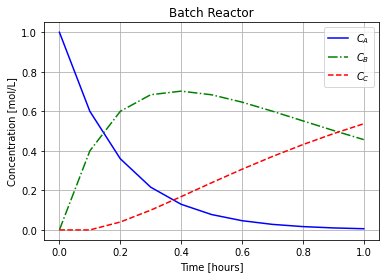

In [6]:
t_,C_ = forward_euler_system(A_rxn,c_rxn,c0,Delta_t,t_final/Delta_t)
plot_concentrations(t_,C_)

#### Backward Euler

In [7]:
def backward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    #
    numsteps = int(numsteps)
    unknowns = y0.size
    
    #
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    #
    y[0:unknowns,0] = y0
    
    #
    for n in range(1,numsteps+1):
        
        #
        yold = y[0:unknowns,n-1]
        
        #
        A = Afunc(t[n])
        
        #
        LHS = np.identity(unknowns) - Delta_t * A
        RHS = yold + c(t[n])*Delta_t
        
        # solving linear system of equations
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

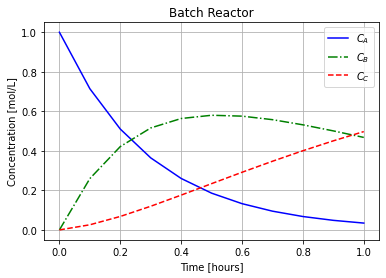

In [8]:
# Add your solution here

#### Crank-Nicolson

In [9]:
def cn_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n])
        LHS = np.identity(unknowns) - 0.5*Delta_t * A
        A = Afunc(t[n-1])
        RHS = yold + 0.5*Delta_t * np.dot(A,yold) + 0.5*(c(t[n-1]) + c(t[n]))*Delta_t
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

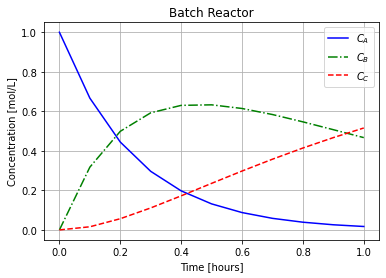

In [10]:
# Add your solution here

#### Runge-Kutta

In [11]:
def RK4_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n-1])
        dy1 = Delta_t * (np.dot(A,yold) + c(t[n-1])) 
        A = Afunc(t[n-1] + 0.5*Delta_t)
        dy2 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy1) 
                         + c(t[n-1] + 0.5*Delta_t))
        dy3 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy2) 
                         + c(t[n-1] + 0.5*Delta_t))
        A = Afunc(t[n] + Delta_t)
        dy4 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + dy3) + c(t[n]))
        y[0:unknowns,n] = y[0:unknowns,n-1] + 1.0/6.0*(dy1 + 2.0*dy2 + 2.0*dy3 + dy4)
    return t, y

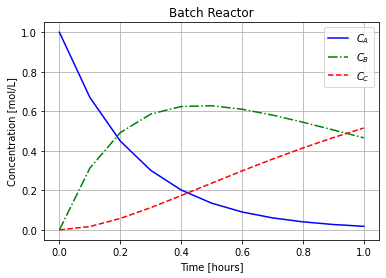

In [12]:
# Add your solution here

### Numerically Integrate using Scipy

Instead of using our coded up systems, use the avaialble scipy methods to integrate and plot the results below.

Using method RK23


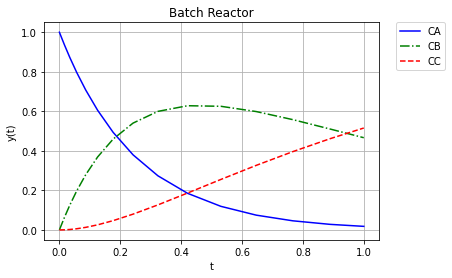

Number of RHS function evaluations: 50
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method RK45


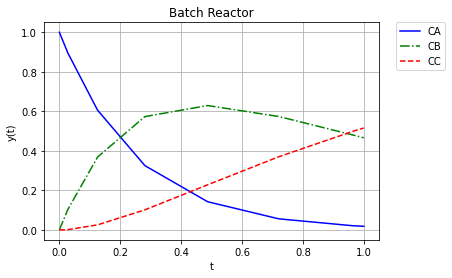

Number of RHS function evaluations: 56
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method Radau


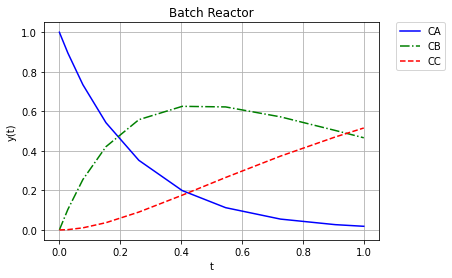

Number of RHS function evaluations: 85
Number of Jacobian evaluations: 2
Number of LU decompositions: 18


Using method BDF


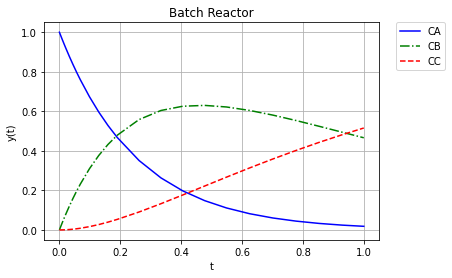

Number of RHS function evaluations: 60
Number of Jacobian evaluations: 1
Number of LU decompositions: 9


Using method LSODA


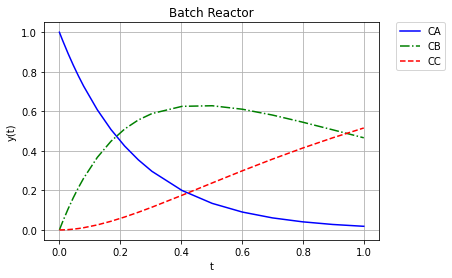

Number of RHS function evaluations: 45
Number of Jacobian evaluations: 0
Number of LU decompositions: 0




In [13]:
# Add your solution here